In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# First Dataset: "games_details.csv"

Have a look to the Datasets, one at a time. Firstly, "games_details.csv".

In [16]:
games_details = pd.read_csv('../dataset/games_details.csv')
games_details.head()

/var/folders/n9/t67xzdkx2kgbmhwxnsryk3xc0000gn/T/ipykernel_1205/1494123576.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('../dataset/games_details.csv')


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [17]:
counter = 0
DNP_criterion = games_details['COMMENT'] == 'DNP - Coach\'s Decision' # le altre colonne sono vuote
for value in DNP_criterion:
    if value:
        counter += 1
print(counter)

58054


Since it's very little wrt the size of the Dataset and there are not clear solutions to fill empty cells, we drop it. The same still true for the start position, indeed:

In [18]:
counter = 0
start_postion_criterion = pd.isna(games_details['START_POSITION'])
for i in start_postion_criterion:
    if i:
        counter += 1
print(counter)

412863


Moreover, we drop all the columns we think could lead to linkage errors and, also, all columns that we think are not useful in the training model, such as the Nickname of the player. Our cleaned Dataset is the following

In [19]:
games_details = games_details.drop(columns=['START_POSITION', 'MIN','COMMENT', 'PLAYER_NAME', 'NICKNAME', 'TEAM_CITY', 'TEAM_ABBREVIATION', 'FGA', 'FGM', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS', 'FG_PCT']) # se non conta, si toglie. Altrimenti
# modificarla cambia il risultato
games_details = games_details[~DNP_criterion]
games_details = games_details.reset_index(drop=True)
games_details.info()
games_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610574 entries, 0 to 610573
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   GAME_ID    610574 non-null  int64  
 1   TEAM_ID    610574 non-null  int64  
 2   PLAYER_ID  610574 non-null  int64  
 3   FG3M       558938 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 18.6 MB


,GAME_ID,TEAM_ID,PLAYER_ID,FG3M
0,22200477,1610612759,1629641,0.0
1,22200477,1610612759,1631110,2.0
2,22200477,1610612759,1627751,0.0
3,22200477,1610612759,1630170,1.0
4,22200477,1610612759,1630200,1.0


**Da aggiungere**: data, stagione, squadra avversaria, capacità + casa/trasferta, coach, anno fondazione squadra, proprietario, general manager, affiliazione

# Second Dataset: "games.csv"

Now, pass to the second Dataset, which is "games.csv".

In [20]:
games = pd.read_csv('../dataset/games.csv')
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [7]:
counter = 0
game_status_text_criterion = games['GAME_STATUS_TEXT'] == 'Final'
for i in game_status_text_criterion:
    counter += 1
print(counter)

26651


So, we can drop that column.

In [8]:
games = pd.read_csv('../dataset/games.csv')
games.info()
games = games.drop(columns=['GAME_STATUS_TEXT'])
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


# Third Dataset: "ranking.csv"

In [9]:
ranking = pd.read_csv('../dataset/ranking.csv')
ranking.info()
ranking = ranking.drop(columns=['LEAGUE_ID', 'RETURNTOPLAY']) # se soli zeri/NaN: rimosse
ranking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210342 entries, 0 to 210341
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        210342 non-null  int64  
 1   LEAGUE_ID      210342 non-null  int64  
 2   SEASON_ID      210342 non-null  int64  
 3   STANDINGSDATE  210342 non-null  object 
 4   CONFERENCE     210342 non-null  object 
 5   TEAM           210342 non-null  object 
 6   G              210342 non-null  int64  
 7   W              210342 non-null  int64  
 8   L              210342 non-null  int64  
 9   W_PCT          210342 non-null  float64
 10  HOME_RECORD    210342 non-null  object 
 11  ROAD_RECORD    210342 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.9+ MB


,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612743,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8
1,1610612763,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9
2,1610612740,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8
3,1610612756,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9
4,1610612746,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7


# Fourth Dataset: "teams.csv"

In [24]:
teams = pd.read_csv('../dataset/teams.csv')
teams.info()
teams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [25]:
teams = teams.drop(columns=['LEAGUE_ID', 'MAX_YEAR']) # max year: 2019
teams.head()

,TEAM_ID,MIN_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1610612737,1949,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,1610612738,1946,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,1610612740,2002,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,1610612741,1966,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,1610612742,1980,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


Looking the Dataset we can notice that some arena capacity values are missing. We've decided to fill it searching the values on google:\
-Smoothie King Center: 17,805 seats;\
-Barclays Center: 17.732 seats;\
-Wells Fargo Center: 20,318 seats;\
-Talking Stick Resort Arena: 17,071 seats;

Moreover, Amway Center capcity seems to be wrong because its value is 0. So, we correct it:\
-Amway Center: 18,846 seats

In [26]:
teams.loc[2, 'ARENACAPACITY'] = 17805.0
teams.loc[12, 'ARENACAPACITY'] = 17732.0
teams.loc[14, 'ARENACAPACITY'] = 18846.0
teams.loc[16, 'ARENACAPACITY'] = 20318.0
teams.loc[17, 'ARENACAPACITY'] = 17071.0

In [27]:
teams

,TEAM_ID,MIN_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1610612737,1949,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,1610612738,1946,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,1610612740,2002,NOP,Pelicans,2002,New Orleans,Smoothie King Center,17805.0,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,1610612741,1966,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,1610612742,1980,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,1610612743,1976,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,1610612745,1967,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,1610612746,1970,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,1610612747,1948,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,1610612748,1988,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


Non dare esito della partita (non disponibile al momento della previsione)
Tirare fuori team id (team_city buttato via perché coincide quasi del tutto con team_id)

```python
def test(dataframe, column, counter = 0):
    for i in range(3, len(dataframe[column])-1):
        if (dataframe[column]).iloc[i-1]!=(dataframe[column]).iloc[i]:
            counter+=1
    print(counter)
    return


test(games_details, 'TEAM_ID')
test(games_details, 'TEAM_CITY')
```



***Aggiungere***: stagione/data, distanza temporale dalla partita prima


MINUTI??? Conoscenza del futuro migliora capacità di previsione ma non legittimo.

# Last but not least Dataset: "players.csv"

In [14]:
players = pd.read_csv('../dataset/players.csv')
players.info()
players

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


# A unique Dataset

In [28]:
Dataset = pd.read_csv('../dataset/Dataset_cleaned.csv')
Dataset.head()

,GAME_ID,TEAM_ID,PLAYER_ID,FG3M,GAME_DATE_EST,SEASON,OPPOSING TEAM,CONFERENCE,G,W,...,HOME_RECORD,ROAD_RECORD,ABBREVIATION,YEARFOUNDED,CITY,ARENA,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,22200477,1610612759,1629641,0.0,NaN,NaN,NaN,West,NaN,NaN,...,NaN,NaN,NaN,1976,NaN,NaN,NaN,NaN,NaN,NaN
1,22200477,1610612759,1631110,2.0,NaN,NaN,NaN,West,NaN,NaN,...,NaN,NaN,NaN,1976,NaN,NaN,NaN,NaN,NaN,NaN
2,22200477,1610612759,1627751,0.0,NaN,NaN,NaN,West,NaN,NaN,...,NaN,NaN,NaN,1976,NaN,NaN,NaN,NaN,NaN,NaN
3,22200477,1610612759,1630170,1.0,NaN,NaN,NaN,West,NaN,NaN,...,NaN,NaN,NaN,1976,NaN,NaN,NaN,NaN,NaN,NaN
4,22200477,1610612759,1630200,1.0,NaN,NaN,NaN,West,NaN,NaN,...,NaN,NaN,NaN,1976,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# label encoder e non one-hot encoding per evitare di aumentare di molto
# dimensionalità del dataset e perché le date e simili hanno effettivamente un ordine

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

We will evaluate the performance of the regression algorithms via k-fold cross-validation.
Before doing that, we choose hyperparameters by means of hyperparameter tuning (quelli su RF sono in realtà più o meno inutili perché si sa già la tendenza al variare di $n_{trees}$ e si ha già la $p$ ottimale. Ma già che c'eravamo...)

To understand the importance of each variable during the decision process, Gini importance is not as effective as feature ablation. Yet the latter is not implemented in scikit-learn, therefore we use Gini as measurement of the importance of variables.

In [16]:
categorical_columns = games_details.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
games_details[list(categorical_columns)] = games_details[list(categorical_columns)].apply(label_encoder.fit_transform)

games_details = games_details.dropna()

games_details = games_details.sample(frac=0.05) # solo  in fase di sviluppo, riduce dimensione

X = games_details.loc[:, games_details.columns != 'FG3M']
y = games_details['FG3M']

reg_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE'])

In [17]:
num_folds = 10

num_features = X.shape[1]
p = int(np.ceil(num_features / 3))
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', p] 
}

rf_regressor = RandomForestRegressor()
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X) # questo non sarebbe legittimo

grid_search = GridSearchCV(rf_regressor, rf_param_grid, cv=num_folds, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

rf_best_params = grid_search.best_params_
print(rf_best_params)

{'max_features': 1, 'n_estimators': 200}


In [26]:
rf_kfolds = KFold(n_splits=num_folds, shuffle=True)
gini_importances = pd.DataFrame(columns=X.columns)

for fold, (train_idx, test_idx) in enumerate(rf_kfolds.split(X)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    rf_regressor = RandomForestRegressor(n_estimators = rf_best_params['n_estimators'], max_features = rf_best_params['max_features'])
    
    rf_regressor.fit(X_train, y_train)
    
    y_pred = rf_regressor.predict(X_test)
    
    current_rf_mae = mean_absolute_error(y_test, y_pred)
    current_rf_mse = mean_squared_error(y_test, y_pred)
    
    reg_metrics.loc[len(reg_metrics)] = ['RF', current_rf_mae, current_rf_mse]

    importances = rf_regressor.feature_importances_
    gini_importances.loc[fold] = importances

In [ ]:
dummy_kfolds = KFold(n_splits=num_folds, shuffle=True)

for train_idx, test_idx in dummy_kfolds.split(X):
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    dummy_regressor = DummyRegressor()
    dummy_regressor.fit(X_train, y_train)
    
    y_dummy_pred = dummy_regressor.predict(X_test)

    current_dummy_mae = mean_absolute_error(y_test, y_dummy_pred)
    current_dummy_mse = mean_squared_error(y_test, y_dummy_pred)

    reg_metrics.loc[len(reg_metrics)] = ['DUMMY', current_dummy_mae, current_dummy_mse]

In [31]:
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}

knn_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(knn_regressor, knn_param_grid, cv=num_folds, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)

knn_best_params = grid_search.best_params_
print(knn_best_params)

{'n_neighbors': 7, 'p': 1}


In [21]:
knn_kfolds = KFold(n_splits=num_folds, shuffle=True)

for train_idx, test_idx in knn_kfolds.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn_regressor = KNeighborsRegressor(n_neighbors = knn_best_params['n_neighbors'], p = knn_best_params['p'])
    knn_regressor.fit(X_train, y_train)
    
    y_pred = knn_regressor.predict(X_test)
    
    current_knn_mae = mean_absolute_error(y_test, y_pred)
    current_knn_mse = mean_squared_error(y_test, y_pred)
    
    reg_metrics.loc[len(reg_metrics)] = ['KNN', current_knn_mae, current_knn_mse]

In [27]:
svm_param_grid = {
    'C': [0.1, 1, 3],
    'gamma': [0.01, 0.1, 1]
}

sv_regressor = SVR()

grid_search_svm = GridSearchCV(sv_regressor, svm_param_grid, cv=num_folds, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_scaled, y)

svm_best_params = grid_search_svm.best_params_
print(svm_best_params)

{'C': 3, 'gamma': 1}


In [28]:
sv_kfolds = KFold(n_splits=num_folds, shuffle=True)

for train_idx, test_idx in sv_kfolds.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    sv_regressor = SVR(C = svm_best_params['C'], gamma = svm_best_params['gamma'])
    sv_regressor.fit(X_train, y_train)
    
    y_pred = sv_regressor.predict(X_test)
    
    current_sv_mae = mean_absolute_error(y_test, y_pred)
    current_sv_mse = mean_squared_error(y_test, y_pred)
    
    reg_metrics.loc[len(reg_metrics)] = ['SVM', current_sv_mae, current_sv_mse]

In [29]:
print(reg_metrics)

    Model       MAE       MSE
0      RF  0.785458  1.340882
1      RF  0.773852  1.265992
2      RF  0.791990  1.347493
3      RF  0.774768  1.311010
4      RF  0.785480  1.300836
5      RF  0.741754  1.120478
6      RF  0.771706  1.246180
7      RF  0.772310  1.257499
8      RF  0.774560  1.302683
9      RF  0.794626  1.345810
10  DUMMY  0.933322  1.485831
11  DUMMY  0.929985  1.507814
12  DUMMY  0.947943  1.613528
13  DUMMY  0.940614  1.545430
14  DUMMY  0.944595  1.603579
15  DUMMY  0.917372  1.438396
16  DUMMY  0.928118  1.462020
17  DUMMY  0.940775  1.606881
18  DUMMY  0.911096  1.459071
19  DUMMY  0.917757  1.426142
20    KNN  0.840787  1.427462
21    KNN  0.816765  1.333533
22    KNN  0.836800  1.381257
23    KNN  0.831076  1.408579
24    KNN  0.841860  1.467263
25    KNN  0.833785  1.384185
26    KNN  0.873294  1.566602
27    KNN  0.854484  1.433904
28    KNN  0.885315  1.625736
29    KNN  0.851570  1.502264
30    SVM  0.758688  1.609869
31    SVM  0.834288  1.936622
32    SVM 

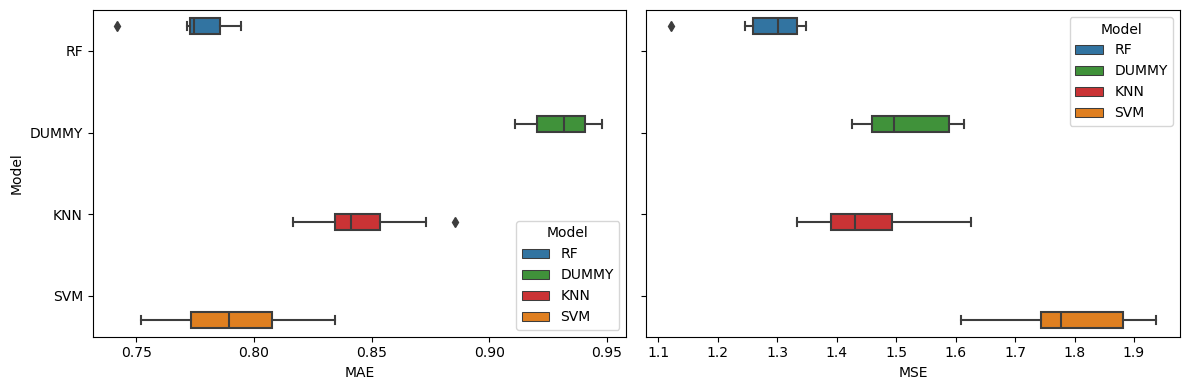

In [30]:
fig, axs = plt.subplots(1, 2, figsize= (12, 4))
sns.boxplot(data=reg_metrics, x="MAE", y="Model", hue = 'Model', ax=axs[0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics, x="MSE", y="Model", hue = 'Model', ax=axs[1], palette=sns.color_palette('Paired')[1::2])
axs[1].set_yticklabels('')
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

Overall, random forest is better, as expected!

In [32]:
print(gini_importances)

    GAME_ID   TEAM_ID  PLAYER_ID
0  0.541022  0.104169   0.354809
1  0.540733  0.104246   0.355021
2  0.539609  0.104391   0.356000
3  0.537122  0.107750   0.355128
4  0.539537  0.108639   0.351824
5  0.538006  0.109205   0.352789
6  0.540393  0.104821   0.354786
7  0.536466  0.110081   0.353453
8  0.537751  0.105638   0.356611
9  0.538697  0.107311   0.353992


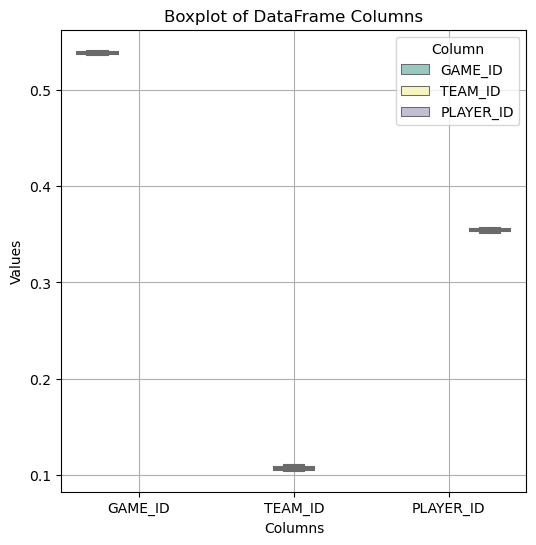

In [59]:
melted_gini = gini_importances.melt(var_name='Column')

# Create boxplot with seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='Column', y='value', data=melted_gini, hue='Column', palette='Set3')

plt.title('Boxplot of Gini importances')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend(title='Column')
plt.grid(True)
plt.show()